## Klasifikasi Machine Learning Untuk Mendeteksi Penyakit Jantung Dengan Algoritma K-Nn, Decision Tree dan Random Forest

Kode ini adalah hasil modifikasi dari penelitian "Analisis Klasifikasi Penyakit Tumor Otak Pada Citra Radiografi Menggunakan Metode Support Vector Machines (SVM) Dengan Python" oleh Lizky Azka Dewi, Universitas Islam Negeri Syarif Hidayatullah. File penelitian dapat diakses di 

https://repository.uinjkt.ac.id/dspace/bitstream/123456789/71124/1/LIZKY%20ASKA%20DEWI-FST.pdf

Data input dapat diakses di 

https://www.kaggle.com/code/ratndeepchavan/prediction-of-heart-failure

### Komentar 

1. Teknik pembagian data yang digunakan pada penelitian asli adalah dengan membagi data menjadi 3 bagian: training set, validation set, dan test set. Caranya adalah dengan menggunakan ```train_test_split``` dua kali. Pada kode ini, hanya dibagi menjadi dua bagian: training set dan test set.

2. Saya menambahkan grafik akurasi antara training set dan test set. Gunanya adalah memilih parameter untuk meminimalisir adanya overfitting dan underfitting.

### Load Data

Di sini ada proses engineering feature dengan mengubah categorical variables menggunakan teknik one-hot encoding atau dummy variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv(r"C:\Users\Rio Agustian\Documents\S2\CODE\heart.csv")
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingBP',
       'RestingECG','ExerciseAngina', 'ST_Slope'])

In [2]:
X = df.drop(['HeartDisease'], axis=1)
y = df[['HeartDisease']]
y = np.array(y).ravel()

### Preprocessing

Membagi data menjadi train dan test. Mengubah nilai maksimum dan minimum data dengan ```MinMaxScaler```.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=4)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### Analyzing KNeighborsClassifier

Dapat dilihat untuk parameter terbaik untuk mencegah underfitting dan overfitting adalah ```n_neigbors=11```.

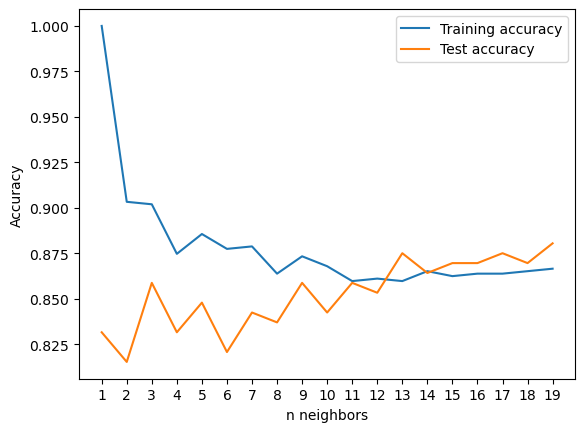

In [6]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score  = []
n_neighbors = np.arange(1, 20, 1)
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(n_neighbors, train_score, label='Training accuracy')
plt.plot(n_neighbors, test_score, label='Test accuracy')
plt.legend(loc='best')
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors);

### Model Evaluation

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11).fit(X_train_scaled, y_train)
knn_pred_train = knn.predict(X_train_scaled)
knn_pred_test  = knn.predict(X_test_scaled)

print('Training set accuracy = {:.2f}'.format(accuracy_score(y_train, knn_pred_train)))
print('Test set accuracy = {:.2f}'.format(accuracy_score(y_test, knn_pred_test)))

print('\nConfussion matrix:\n', confusion_matrix(y_test, knn_pred_test))
print('\nClassification report:\n', classification_report(y_test, knn_pred_test))

Training set accuracy = 0.86
Test set accuracy = 0.86

Confussion matrix:
 [[68 14]
 [12 90]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.87      0.88      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### Analyzing DecisionTreeClassifier

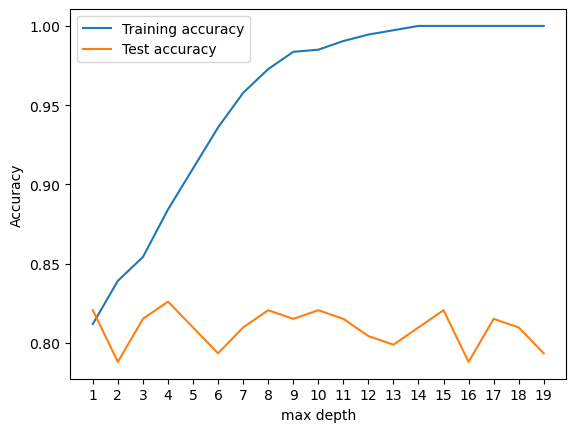

In [8]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score  = []
params = np.arange(1, 20, 1)

for i in params:
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train_scaled, y_train)
    train_score.append(clf.score(X_train_scaled, y_train))
    test_score.append(clf.score(X_test_scaled, y_test))

plt.plot(params, train_score, label='Training accuracy')
plt.plot(params, test_score, label='Test accuracy')
plt.legend(loc='best')
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.xticks(params);

### Model Evaluation

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = DecisionTreeClassifier(max_depth=1).fit(X_train_scaled, y_train)
clf_pred_train = clf.predict(X_train_scaled)
clf_pred_test  = clf.predict(X_test_scaled)

print('Training set accuracy = {:.2f}'.format(accuracy_score(y_train, clf_pred_train)))
print('Test set accuracy = {:.2f}'.format(accuracy_score(y_test, clf_pred_test)))

print('\nConfussion matrix:\n', confusion_matrix(y_test, clf_pred_test))
print('\nClassification report:\n', classification_report(y_test, clf_pred_test))

Training set accuracy = 0.81
Test set accuracy = 0.82

Confussion matrix:
 [[63 19]
 [14 88]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.82      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



### Analyzing RandomForestClassifier

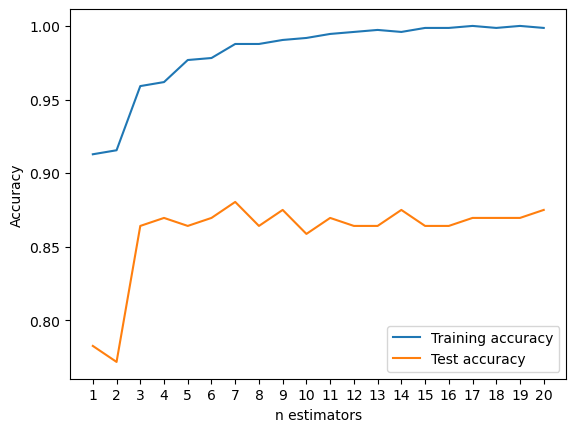

In [46]:
from sklearn.ensemble import RandomForestClassifier

train_score = []
test_score  = []
params = np.arange(1, 21, 1)

for i in params:
    clf = RandomForestClassifier(n_estimators=i, random_state=30).fit(X_train_scaled, y_train)
    train_score.append(clf.score(X_train_scaled, y_train))
    test_score.append(clf.score(X_test_scaled, y_test))

plt.plot(params, train_score, label='Training accuracy')
plt.plot(params, test_score, label='Test accuracy')
plt.legend(loc='best')
plt.xlabel('n estimators')
plt.ylabel('Accuracy')
plt.xticks(params);

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(1, 21, 1)}
grid_search = GridSearchCV(RandomForestClassifier(random_state=30), param_grid, cv=5)
grid_search.fit(X_test_scaled, y_test)

print('Best parameter = {}'.format(grid_search.best_params_))
print('Best cross-validation score = {:.2f}'.format(grid_search.best_score_))

Best parameter = {'n_estimators': 16}
Best cross-validation score = 0.84


### Model Evaluation

In [48]:
clf = RandomForestClassifier(n_estimators=16, random_state=30).fit(X_train_scaled, y_train)
clf_pred_train = clf.predict(X_train_scaled)
clf_pred_test  = clf.predict(X_test_scaled)

print('Training set accuracy = {:.2f}'.format(accuracy_score(y_train, clf_pred_train)))
print('Test set accuracy = {:.2f}'.format(accuracy_score(y_test, clf_pred_test)))

print('\nConfussion matrix:\n', confusion_matrix(y_test, clf_pred_test))
print('\nClassification report:\n', classification_report(y_test, clf_pred_test))

Training set accuracy = 1.00
Test set accuracy = 0.86

Confussion matrix:
 [[66 16]
 [ 9 93]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

